In [1]:
# Configure the integration and enable interactive mode
# Se ho una lorentziana, sto descrivendo un tempo di vita definito e la larghezza della lor è il tempo di vita media
%matplotlib widget
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from FunFit import *

C:\Users\fsfinardi\AppData\Local\Temp\ipykernel_25416\2363517263.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# qubit_spec_20230801

In [2]:

dir_path = "C:\\Users\\fsfinardi\\Documents\\01_Personali\\Università-2324\\LabCrio\\data\\qubit_spectroscopy"
# dir_path = "C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\qubit_spectroscopy"

dirs = os.listdir(dir_path)
for name in dirs:
    print(f'Directory {dirs.index(name)}: {name}')

file = np.load(f"{dir_path}\\{dirs[2]}\\data\\qubit spectroscopy_0\\data.npz")
print(file.files)

Directory 0: qubit_spec_20230801
Directory 1: qubit_spec_20230803
Directory 2: qubit_spec_20230809
['D1', 'D2', 'D3']


In [3]:
D1 = file['D1']
D2 = file['D2']
D3 = file['D3']

print(D1.dtype)
D1_freq = D1['freq']
D1_msr = D1['msr']
D1_phase = D1['phase']

[('freq', '<f8'), ('msr', '<f8'), ('phase', '<f8')]


## Qubit_D1 - Frequency vs MSR and Frequency vs Phase

Qui misuro risonatore accoppiato a uno dei due stati, in funzione della freq inviata  al Qubit. Ricordarsi SHIFT DEL RISONATORE

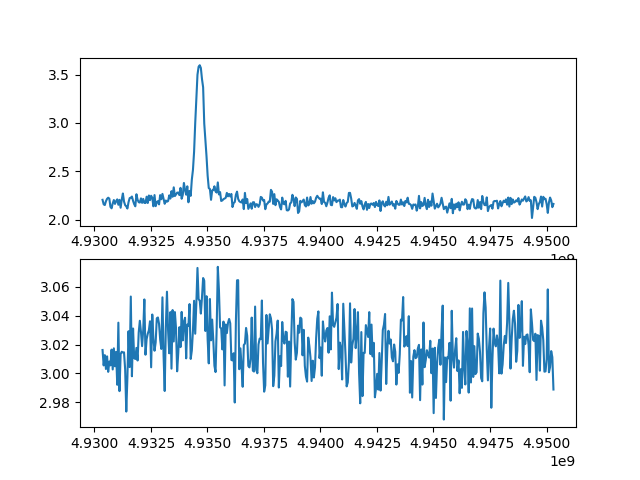

In [4]:
plt.figure()
plt.subplot(211)
plt.plot(D1_freq, D1_msr)
plt.subplot(212)
plt.plot(D1_freq, D1_phase)

## Moving Avarage

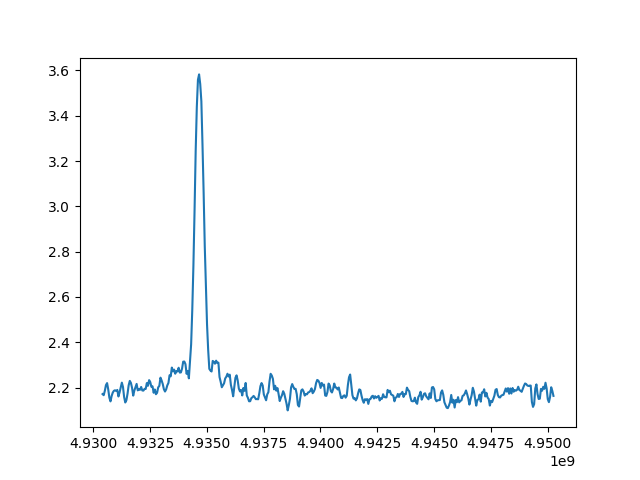

In [5]:
window_size = 3
x, y = moving_avg(D1_freq, D1_msr, window_size).values()

plt.figure()
plt.plot(x, y)

## Setting the initial values for the fit

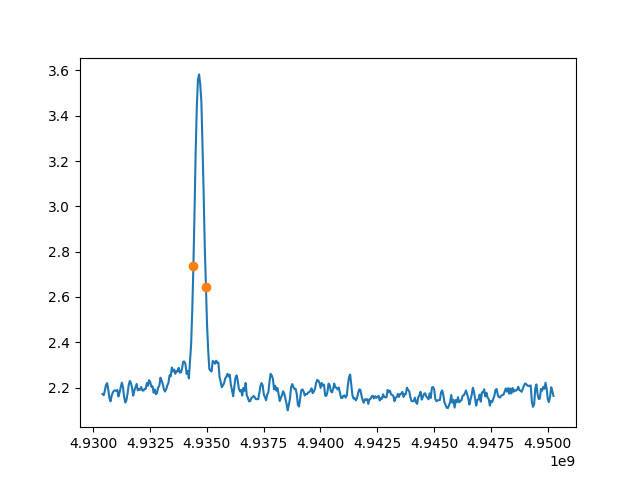

Minimum: 2.0993511887771032
Maximum: 3.582645507227557
f peak: 4934657493.0
Gamma: 0.00055


In [6]:
D1_min = min(y)
D1_max = max(y)
idx_max = y.index(max(y))
D1_peak = x[idx_max]

half_height = (D1_max + D1_min)/2

argMax = np.argmax(y)
idx_L = np.argmin(np.abs(half_height - np.array(y[:argMax])))
idx_R = np.argmin(np.abs(half_height - np.array(y[argMax:]))) + (idx_max + 1)

fig = plt.figure()
plt.plot(x, y)
plt.plot([x[idx_L],x[idx_R]], [y[idx_L],y[idx_R]], ls = 'none', marker = 'o')

D1_gamma = x[idx_R] - x[idx_L]
plt.show()

print('Minimum:', D1_min)
print('Maximum:', D1_max)
print('f peak:', D1_peak)
print('Gamma:', D1_gamma/1e9)


## Fit with "best" parameters found

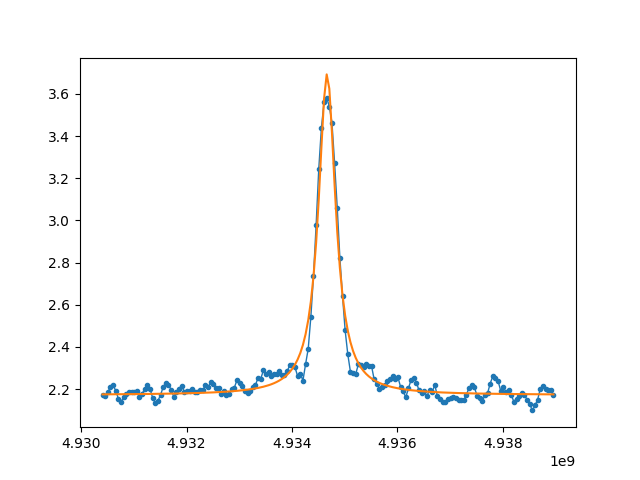

In [7]:
x_c, y_c = data_cut(x, y, 4.93e9, 4.939e9).values()

# Amplitude, x0, Gamma, Minimum
pars = [D1_max, D1_peak, D1_gamma, D1_min]

pars_opt, err_cov = curve_fit(Lorentzian, x, y, pars)
plt.figure()
plt.plot(x_c, y_c, marker = '.', linewidth = 1)   
plt.plot(x_c, Lorentzian(x_c, *pars_opt))
